In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
img=cv2.imread('lena512color.tiff',0)
print(img)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


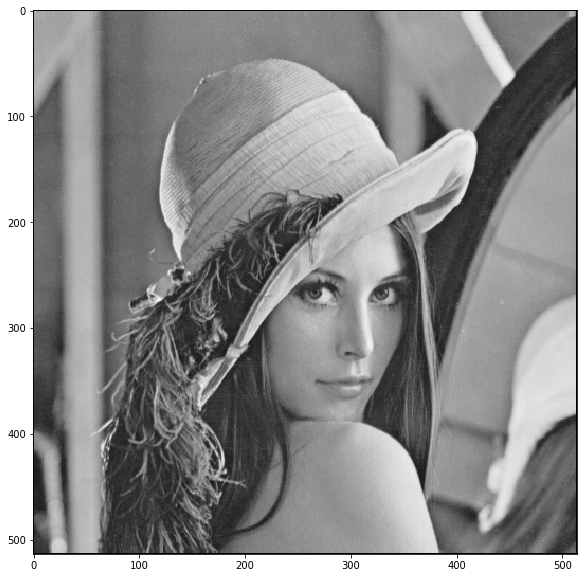

In [11]:
img_arr=np.asarray(img)
height,width=np.shape(img)
img_padded=np.zeros((height+2,width+2),dtype='uint8')
for i in range (height):
    for j in range(width):
        img_padded[i+1][j+1]=img_arr[i][j]
        
plt.figure(figsize=(10,10))
plt.imshow(img_padded,'gray')

[[  0   0   0 ...   0   0   0]
 [  0  28  31 ...   4   7   7]
 [  0 124 255 ...  68 199 199]
 ...
 [  0 112 249 ...  28   4  15]
 [  0 124 255 ... 126  12 143]
 [  0  28  63 ... 127  92  28]]


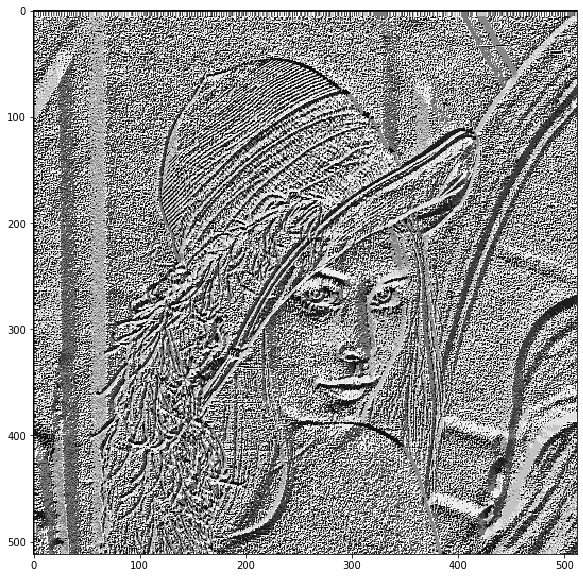

In [12]:
def get_pixel(img, center, x, y): 
    if img[x][y] >= center: 
        return 1
    else:
        return 0

def lbp_calculated_pixel(img,x,y):
    center=img[x][y]

    """  -->
        ^  |   CLOCKWISE
        |  v
         <--
    """

    new_center_pixel=(
        get_pixel(img,center,x-1,y-1)*128+
        get_pixel(img,center,x-1,y)*64+
        get_pixel(img,center,x-1,y+1)*32+
        get_pixel(img,center,x,y+1)*16+
        get_pixel(img,center,x+1,y+1)*8+
        get_pixel(img,center,x+1,y)*4+
        get_pixel(img,center,x+1,y-1)*2+
        get_pixel(img,center,x,y-1)*1)

    return new_center_pixel

lbp_arr=np.zeros((height,width),dtype='uint8')

for i in range (1,height):
    for j in range(1,width):
        lbp_arr[i][j]=lbp_calculated_pixel(img_padded,i,j)

print(lbp_arr)
fig=plt.figure(figsize=(10,10))
plt.imshow(lbp_arr,'gray')